<h1>Challenge of the Month (Feburary )<h1>
    <h2>AI Heart Disease Detector</h2>
<h3>Saanvi Tayal (Grade: 9)</h3>

<h2>3.Data Exploration</h2>

<h3>Loading and understanding the dataset</h3>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

df = pd.read_csv("heart.csv")

In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Details of columns
<ol><li>age</li>
<li>sex (1 = male; 0 = female)</li> 
<li>chest pain type (4 values)</li>
<li>resting blood pressure</li>
<li>serum cholestoral in mg/dl</li>
<li>fasting blood sugar > 120 mg/dl</li>
<li>resting electrocardiographic results (values 0,1,2)</li>
<li>maximum heart rate achieved</li>
<li>exercise induced angina</li>
<li>oldpeak = ST depression induced by exercise relative to rest</li>
<li>the slope of the peak exercise ST segment</li>
<li>number of major vessels (0-3) colored by flourosopy</li>
<li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li></ol>

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>Performing EDA on the dataset</h3>

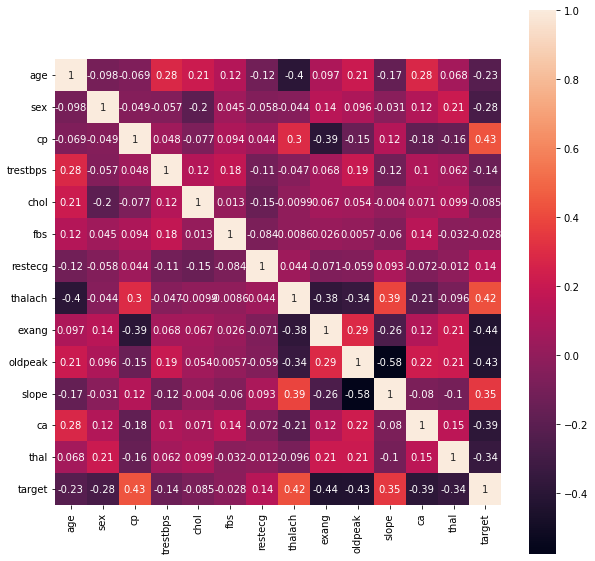

In [9]:
correlation = df.corr()
fig_corr= plt.gcf();
fig_corr.set_size_inches(10,10);
sns.heatmap(correlation,annot = True, square = True)

plt.show()

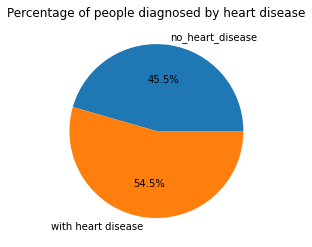

In [10]:
df_target = df.groupby("target").size()
df_target
plt.pie(df_target.values, labels = ["no_heart_disease", "with heart disease"], autopct='%1.1f%%') 
plt.title("Percentage of people diagnosed by heart disease")
plt.show()
#54.5% people who were diagnosed with heart disease

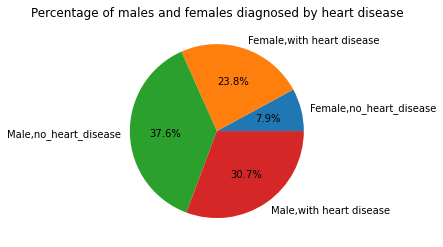

In [11]:
df_sex = df.groupby(["sex","target"]).size()
df_sex
plt.pie(df_sex.values, labels = ["Female,no_heart_disease", "Female,with heart disease", "Male,no_heart_disease", "Male,with heart disease"],autopct='%1.1f%%')
plt.title("Percentage of males and females diagnosed by heart disease")
plt.show()

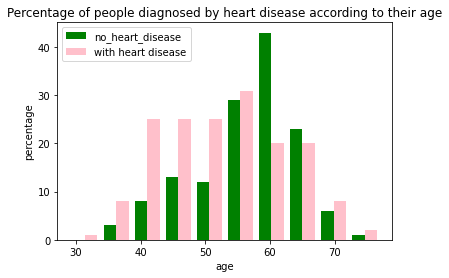

In [12]:
plt.hist([df[df.target==0].age, df[df.target==1].age], label = ["no_heart_disease","with heart disease"],color=["green","pink"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.title("Percentage of people diagnosed by heart disease according to their age")
plt.legend()
plt.show()

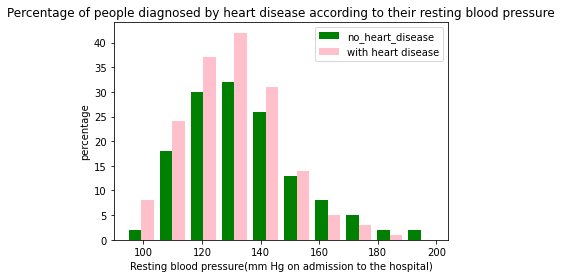

In [13]:
plt.hist([df[df.target==0].trestbps,df[df.target==1].trestbps],label = ["no_heart_disease","with heart disease"],color=["green","pink"])
plt.xlabel("Resting blood pressure(mm Hg on admission to the hospital)")
plt.ylabel("percentage")
plt.title("Percentage of people diagnosed by heart disease according to their resting blood pressure")
plt.legend()
plt.show()

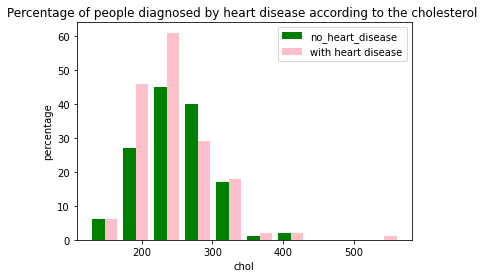

In [14]:
plt.hist([df[df.target==0].chol, df[df.target==1].chol], label = ["no_heart_disease","with heart disease"],color=["green","pink"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.title("Percentage of people diagnosed by heart disease according to the cholesterol ")
plt.legend()
plt.show()

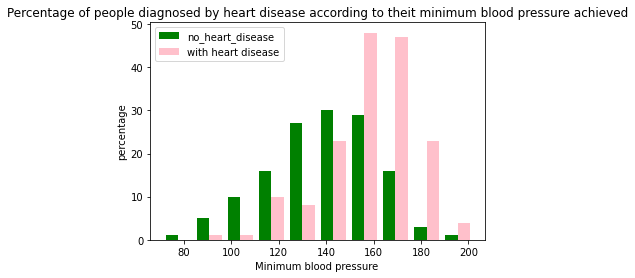

In [15]:
plt.hist([df[df.target==0].thalach,df[df.target==1].thalach],label = ["no_heart_disease","with heart disease"],color=["green","pink"])
plt.xlabel("Minimum blood pressure ")
plt.ylabel("percentage")
plt.title("Percentage of people diagnosed by heart disease according to theit minimum blood pressure achieved")
plt.legend()
plt.show()

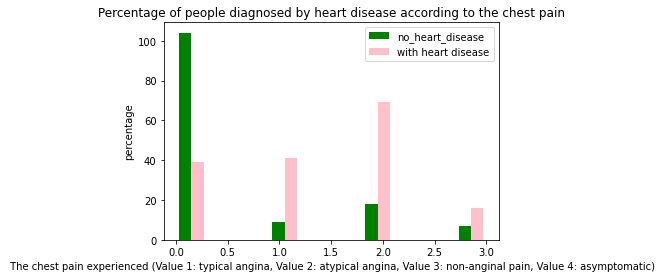

In [16]:
plt.hist([df[df.target==0].cp,df[df.target==1].cp],label = ["no_heart_disease","with heart disease"],color=["green","pink"])
plt.xlabel(" The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)")
plt.ylabel("percentage")
plt.title("Percentage of people diagnosed by heart disease according to the chest pain")
plt.legend()
plt.show()

<h2>4.Modelling</h2>

In [17]:
X=df.drop(['target'], axis=1)
y=df['target']

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape

(242, 13)

In [19]:
#Scaling the data
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_valid=pd.DataFrame(sc.transform(X_valid))

X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.327733,-1.436416,0.985842,-0.574125,-0.632674,-0.418040,0.901639,0.656262,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
1,1.249032,-1.436416,0.985842,0.831066,0.585437,-0.418040,-0.979367,0.094007,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
2,0.352766,0.696177,0.985842,0.479768,-0.670155,2.392117,-0.979367,0.656262,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
3,0.912932,-1.436416,-0.922749,-0.457026,-0.932517,-0.418040,0.901639,-0.597999,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
4,0.240733,0.696177,0.031547,1.299463,-0.276611,-0.418040,-0.979367,0.613011,-0.709299,-0.892493,0.955779,0.265165,-0.464729


In [20]:
#Fixing column names as scaling renamed it.
X_train.columns= X.columns   
X_valid.columns= X.columns

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.327733,-1.436416,0.985842,-0.574125,-0.632674,-0.418040,0.901639,0.656262,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
1,1.249032,-1.436416,0.985842,0.831066,0.585437,-0.418040,-0.979367,0.094007,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
2,0.352766,0.696177,0.985842,0.479768,-0.670155,2.392117,-0.979367,0.656262,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
3,0.912932,-1.436416,-0.922749,-0.457026,-0.932517,-0.418040,0.901639,-0.597999,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
4,0.240733,0.696177,0.031547,1.299463,-0.276611,-0.418040,-0.979367,0.613011,-0.709299,-0.892493,0.955779,0.265165,-0.464729


In [21]:
#Funtion to build and visualise a confusion matrix which will be used to evalute the performance of models.
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} accuracy score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

<h4>Decision trees</h4>

Decision Tree accuracy score: 81.97%
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



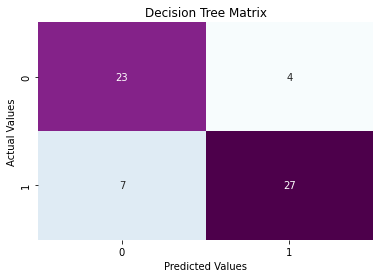

In [22]:
# model and fit
des_t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
des_t.fit(X_train, y_train);
y_pred_des = des_t.predict(X_valid)
cm_rfc=my_confusion_matrix(y_valid, y_pred_des, 'Decision Tree Matrix', 'Decision Tree')

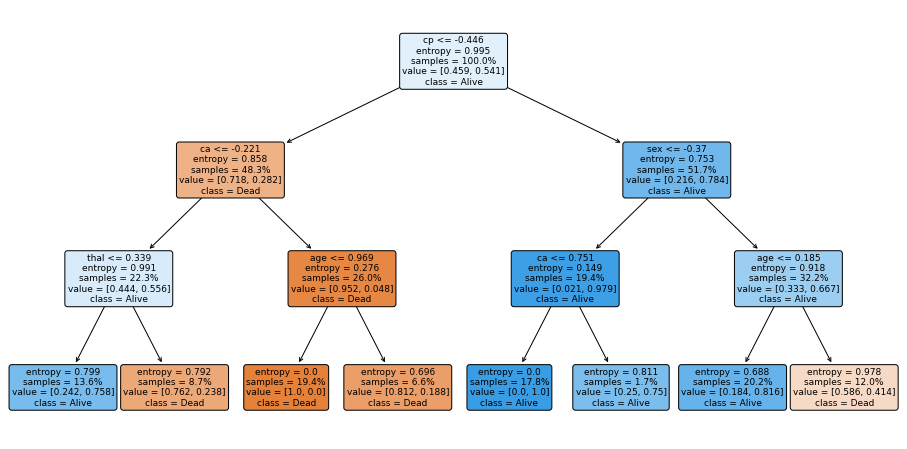

In [24]:
# visualization
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(des_t, feature_names = X_train.columns, 
                     class_names = ['Dead', 'Alive'], 
                     max_depth=4, fontsize=9, proportion=True, filled=True, rounded=True)

<h4>Logistic Regression </h4>

Logistic Regression accuracy score: 85.25%
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



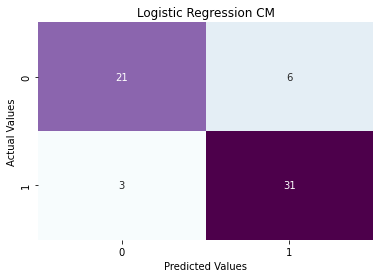

array([[21,  6],
       [ 3, 31]], dtype=int64)

In [41]:
log_reg_classifier=LogisticRegression(C= 0.1, penalty= 'l2')
re= log_reg_classifier.fit(X_train, y_train)
y_pred=log_reg_classifier.predict(X_valid)
my_confusion_matrix(y_valid, y_pred, 'Logistic Regression CM', 'Logistic Regression')

<h4>Random Forest</h4>

Random Forest accuracy score: 81.97%
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



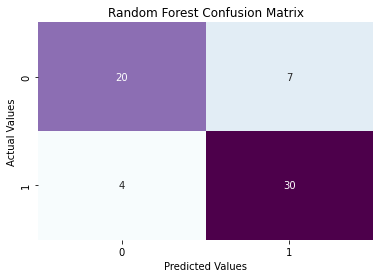

In [26]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix', 'Random Forest')

<h4>Support Vector Classifier</h4>

SVC accuracy score: 83.61%
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.90      0.79      0.84        34

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



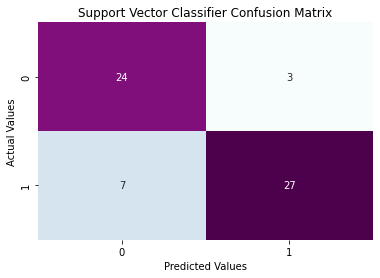

In [27]:
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_valid)
cm_svc=my_confusion_matrix(y_valid, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

<h2>5.Evalution</h2>

In [42]:
t2 = pd.DataFrame()
t2["age"]=[40]
t2["sex"]=[0]
t2["cp"]=[3]
t2["trestbps"]=[130]
t2["chol"]=[230]
t2["fbs"]=[1]
t2["restecg"]=[0]
t2["thalach"]=[150]
t2["exang"]=[1]
t2["oldpeak"]=[2.3]
t2["slope"]=[2]
t2["ca"]=[0]
t2["thal"]=[1]

predicts = re.predict(t2)
print((predicts))

[1]


In [43]:
labels = ["no heart disease","with heart disease"]
results = labels[int(predicts)]
print(results)

with heart disease
